In [ ]:
import os
os.environ['OPENAI_API_KEY'] = "EXAMPLE"

In [2]:
cd /content/drive/MyDrive/Colab Notebooks/langchainsawman/week4

/content/drive/MyDrive/Colab Notebooks/langchainsawman/week4


# 텍스트 분할기
##### 긴 문서를 모델의 컨텍스트 창에 맞을 수 있는 작은 덩어리로 분할하는 경우가 대다수다.
##### 높은 level에서 텍스트 분할기는 아래와 같이 수행된다.


1. 텍스트를 의미상으로 의미 있는 작은 덩어리(청크)로 나눈다.
2. 특정 크기에 도달할 때까지 이러한 작은 덩어리를 더 큰 덩어리로 결합하기 시작한다.
3. 해당 크기에 도달하면 해당 청크를 고유한 텍스트 조각으로 만든 다음 (청크 간 컨텐스트 유지를 위해) 약간 겹치는 새 텍스트 청크를 만든다.

##### 즉, 텍스트 분할기에서 사용자가 정의할 수 있는 두 가지 부분이 존재한다.



1.   텍스트가 분할되는 방식
2.   청크 크기 측정 방법





In [1]:
!pip install -qU langchain-text-splitters

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.4/278.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 5.0 MB/s eta 0:00:00


## Langchain의 다양한 텍스트 분할기
##### langchain-text-splitters 패키지에 모두 들어가있다.


*   name : 텍스트 분할기의 이름
*   splits : 텍스트 분할기가 텍스트를 분할하는 방법
*   Adds Metadata : 텍스트 분할기가 각 청크의 출처에 대한 메타데이터를 추가하는지 여부
*   Description :  분할기에 대한 설명

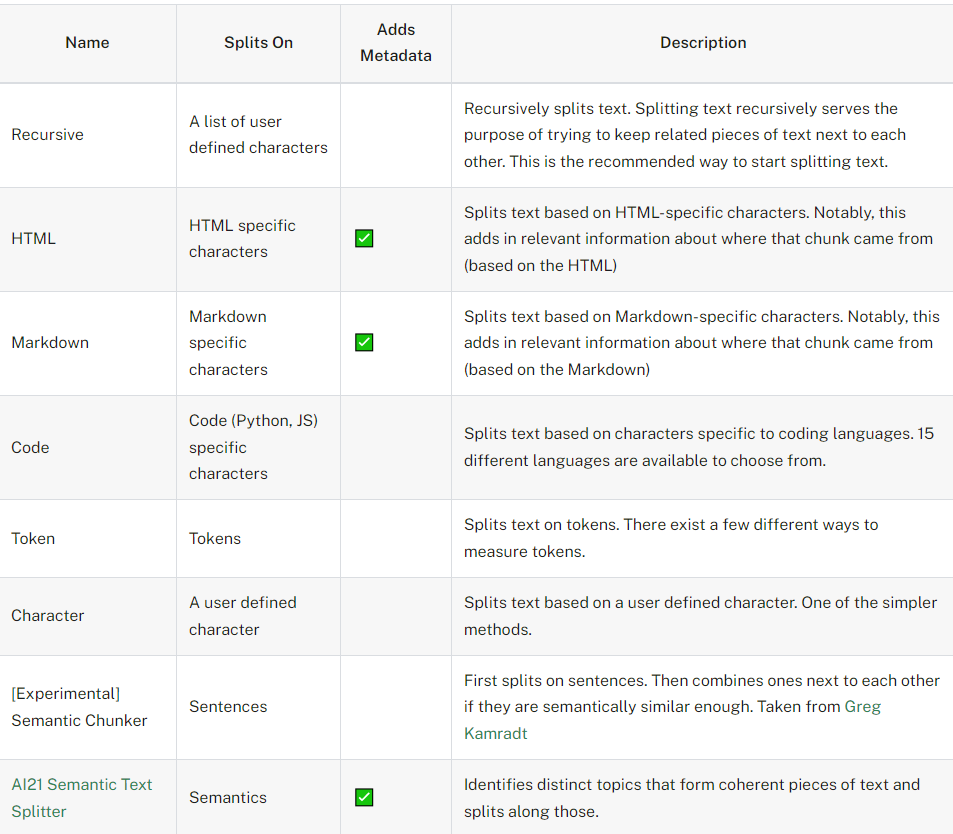

## HTML 헤더로 분할(HTMLHeaderTextSplitter)
##### html 헤더에 따라 텍스트 분할 및 다른 분할기로 파이프라인도 가능하다
##### 단점으로는 html 문서마다 구조적으로 약간 차이가 있어서 특정 헤더가 누락될 수 있다.

In [5]:
from langchain_text_splitters import HTMLHeaderTextSplitter

html_string = """
<!DOCTYPE html>
<html>
<body>
    <div>
        <h1>Foo</h1>
        <p>Some intro text about Foo.</p>
        <div>
            <h2>Bar main section</h2>
            <p>Some intro text about Bar.</p>
            <h3>Bar subsection 1</h3>
            <p>Some text about the first subtopic of Bar.</p>
            <h3>Bar subsection 2</h3>
            <p>Some text about the second subtopic of Bar.</p>
        </div>
        <div>
            <h2>Baz</h2>
            <p>Some text about Baz</p>
        </div>
        <br>
        <p>Some concluding text about Foo</p>
    </div>
</body>
</html>
"""

headers_to_split_on = [
    ("h1", "Header 1"),
    ("h2", "Header 2"),
    ("h3", "Header 3"),
]

html_splitter = HTMLHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
html_header_splits = html_splitter.split_text(html_string)
html_header_splits

[Document(page_content='Foo'),
 Document(page_content='Some intro text about Foo.  \nBar main section Bar subsection 1 Bar subsection 2', metadata={'Header 1': 'Foo'}),
 Document(page_content='Some intro text about Bar.', metadata={'Header 1': 'Foo', 'Header 2': 'Bar main section'}),
 Document(page_content='Some text about the first subtopic of Bar.', metadata={'Header 1': 'Foo', 'Header 2': 'Bar main section', 'Header 3': 'Bar subsection 1'}),
 Document(page_content='Some text about the second subtopic of Bar.', metadata={'Header 1': 'Foo', 'Header 2': 'Bar main section', 'Header 3': 'Bar subsection 2'}),
 Document(page_content='Baz', metadata={'Header 1': 'Foo'}),
 Document(page_content='Some text about Baz', metadata={'Header 1': 'Foo', 'Header 2': 'Baz'}),
 Document(page_content='Some concluding text about Foo', metadata={'Header 1': 'Foo'})]

In [ ]:
# HTML 문자열 콘텐츠에서 로드된 HTML을 사용하여 다른 스플리터로 파이프라인 수행
from langchain_text_splitters import RecursiveCharacterTextSplitter

url = "https://plato.stanford.edu/entries/goedel/"

headers_to_split_on = [
    ("h1", "Header 1"),
    ("h2", "Header 2"),
    ("h3", "Header 3"),
    ("h4", "Header 4"),
]

html_splitter = HTMLHeaderTextSplitter(headers_to_split_on=headers_to_split_on)

# for local file use html_splitter.split_text_from_file(<path_to_file>)
html_header_splits = html_splitter.split_text_from_url(url)

chunk_size = 500
chunk_overlap = 30
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size, chunk_overlap=chunk_overlap
)

# Split
splits = text_splitter.split_documents(html_header_splits)
splits[80:85]

## HTML 섹션으로 분할(HTMLSectionSplitter)
##### HTMLHeaderTextPlister와 개념이 유사하다.

In [ ]:
from langchain_text_splitters import HTMLSectionSplitter

html_string = """
    <!DOCTYPE html>
    <html>
    <body>
        <div>
            <h1>Foo</h1>
            <p>Some intro text about Foo.</p>
            <div>
                <h2>Bar main section</h2>
                <p>Some intro text about Bar.</p>
                <h3>Bar subsection 1</h3>
                <p>Some text about the first subtopic of Bar.</p>
                <h3>Bar subsection 2</h3>
                <p>Some text about the second subtopic of Bar.</p>
            </div>
            <div>
                <h2>Baz</h2>
                <p>Some text about Baz</p>
            </div>
            <br>
            <p>Some concluding text about Foo</p>
        </div>
    </body>
    </html>
"""

headers_to_split_on = [("h1", "Header 1"), ("h2", "Header 2")]

html_splitter = HTMLSectionSplitter(headers_to_split_on=headers_to_split_on)
html_header_splits = html_splitter.split_text(html_string)
html_header_splits

## 문자별로 분할(CharacterTextSplitter)
##### 가장 간단한 방법이고, 문자를 기준으로 분할하고 문자 수로 청크 길이를 측정한다.


1.   텍스트 분할 방법 : 단일 문자 기준
2.   청크 크기 측정 방법 : 문자 수 기준



In [ ]:
with open("../../state_of_the_union.txt") as f:
    state_of_the_union = f.read()

In [ ]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator="\n\n",
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len,
    is_separator_regex=False,
)

In [ ]:
texts = text_splitter.create_documents([state_of_the_union])
print(texts[0])

In [ ]:
# 메타데이터도 같이 전달
metadatas = [{"document": 1}, {"document": 2}]
documents = text_splitter.create_documents(
    [state_of_the_union, state_of_the_union], metadatas=metadatas
)
print(documents[0])

## 코드별 분할(CodeTextSplitter)
##### 여러 언어에 따라 코드를 분할할 수 있다.

## Markdown 헤더 분할(MarkdownHeaderTextSplitter)

In [8]:
from langchain_text_splitters import MarkdownHeaderTextSplitter

In [ ]:
markdown_document = "# Foo\n\n    ## Bar\n\nHi this is Jim\n\nHi this is Joe\n\n ### Boo \n\n Hi this is Lance \n\n ## Baz\n\n Hi this is Molly"

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
md_header_splits = markdown_splitter.split_text(markdown_document)
md_header_splits

In [ ]:
markdown_document = "# Intro \n\n    ## History \n\n Markdown[9] is a lightweight markup language for creating formatted text using a plain-text editor. John Gruber created Markdown in 2004 as a markup language that is appealing to human readers in its source code form.[9] \n\n Markdown is widely used in blogging, instant messaging, online forums, collaborative software, documentation pages, and readme files. \n\n ## Rise and divergence \n\n As Markdown popularity grew rapidly, many Markdown implementations appeared, driven mostly by the need for \n\n additional features such as tables, footnotes, definition lists,[note 1] and Markdown inside HTML blocks. \n\n #### Standardization \n\n From 2012, a group of people, including Jeff Atwood and John MacFarlane, launched what Atwood characterised as a standardisation effort. \n\n ## Implementations \n\n Implementations of Markdown are available for over a dozen programming languages."

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
]

# MD splits
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on, strip_headers=False
)
md_header_splits = markdown_splitter.split_text(markdown_document)

# Char-level splits
from langchain_text_splitters import RecursiveCharacterTextSplitter

chunk_size = 250
chunk_overlap = 30
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size, chunk_overlap=chunk_overlap
)

# Split
splits = text_splitter.split_documents(md_header_splits)
splits

## 재귀적으로 분할된 JSON(RecursiveJsonSpliter)
##### 먼저 json 데이터 깊이를 탐색하고 더 작은 json 청크를 구축한다.



1.   텍스트 분할 방법 : json 값
2.   청크 크기 측정 방법 : 문자 수 기준






In [11]:
import json
import requests

In [12]:
# This is a large nested json object and will be loaded as a python dict
json_data = requests.get("https://api.smith.langchain.com/openapi.json").json()

In [13]:
from langchain_text_splitters import RecursiveJsonSplitter

splitter = RecursiveJsonSplitter(max_chunk_size=300)
json_chunks = splitter.split_json(json_data=json_data)

In [ ]:
json_chunks

In [15]:
# The splitter can also output documents
docs = splitter.create_documents(texts=[json_data])

# or a list of strings
texts = splitter.split_text(json_data=json_data)

print(texts[0])
print(texts[1])

{"openapi": "3.1.0", "info": {"title": "LangSmith", "version": "0.1.0"}, "servers": [{"url": "https://api.smith.langchain.com", "description": "LangSmith API endpoint."}]}
{"paths": {"/api/v1/sessions/{session_id}": {"get": {"tags": ["tracer-sessions"], "summary": "Read Tracer Session", "description": "Get a specific session.", "operationId": "read_tracer_session_api_v1_sessions__session_id__get"}}}}


## 문자별로 재귀적으로 분할(RecursiveCharacteTextSplitter)
##### 해당 텍스트 분할기는 일반 텍스트에 권장된다.



1.   텍스트 분할 방법 : 문자 목록 기준
2.   청크 크기 측정 방법 : 문자 수 기준

##### 추가 구분 기호 목록을 사용할 수 있다.


In [ ]:
with open("../../state_of_the_union.txt") as f:
    state_of_the_union = f.read()

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)

In [ ]:
texts = text_splitter.create_documents([state_of_the_union])
print(texts[0])
print(texts[1])

In [ ]:
text_splitter.split_text(state_of_the_union)

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    separators=[
        "\n\n",
        "\n",
        " ",
        ".",
        ",",
        "\u200B",  # Zero-width space
        "\uff0c",  # Fullwidth comma
        "\u3001",  # Ideographic comma
        "\uff0e",  # Fullwidth full stop
        "\u3002",  # Ideographic full stop
        "",
    ],
    # Existing args
)

## 의미론적 청킹
##### 의미론적 유사성을 기준으로 텍스트를 분할한다.
##### 핵심은 임베딩 공간에서 유사한 문장을 병합한다는 것이다.

In [ ]:
!pip install --quiet langchain_experimental langchain_openai

In [ ]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_openai.embeddings import OpenAIEmbeddings

In [ ]:
text_splitter = SemanticChunker(OpenAIEmbeddings())

In [ ]:
docs = text_splitter.create_documents([state_of_the_union])
print(docs[0].page_content)

##### 해당 청크 방법은 언제 문장을 분할할지 결정하여 작동한다.
##### 두 문장 사이의 임베딩 차이를 찾아 수행된다. 그 차이가 특정 임계값을 초과하면 분할된다.



1.   백분위수 : ```
breakpoint_threshold_type="percentile"
```
2.   표준 편차 : ```
breakpoint_threshold_type="standard_deviation" ```
3. 사분위 수 : ```
breakpoint_threshold_type="interquartile" ```



## 토큰으로 분할
##### 텍스트를 청크로 나눌 때 토큰 수를 세는 것이 좋다. 기본적으로 언어 모델에 사용된 것과 동일한 토크나이저를 사용해야 한다.

### tiktoken(CharacterTextSplitter.from_tiktoken_encoder)
##### 토큰 추정 가능
##### encoding에 모델 이름 or 실제 encoding 인수 사용 가능


1.   텍스트 분할 방법 : 전달된 문자 기준
2.   청크 크기 측정 방법 : tiktoken 토크나이저를 통해



In [17]:
!pip install --upgrade --quiet langchain-text-splitters tiktoken

In [ ]:
with open("../../state_of_the_union.txt") as f:
    state_of_the_union = f.read()
from langchain_text_splitters import CharacterTextSplitter

In [ ]:
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    encoding="cl100k_base", chunk_size=100, chunk_overlap=0
)
texts = text_splitter.split_text(state_of_the_union)

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursoiveCharacterTextSplitter.from_tiktoken_encoder(
    model_name="gpt-4",
    chunk_size=100,
    chunk_overlap=0,
)

##### spaCy, NLTK, KoNLPy(한국어), 허깅페이스 토크나이저 등 많은 토크나이저가 있다.